In [7]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36
/bin/bash: line 1: mamba: command not found


**Define Graphing Function**


In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [56]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Define Graphing Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

**Use Webscraping to Extract Tesla Revenue Data**

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GOEV/canoo/revenue. Save the text of the response as a variable named html_data.
Parse the html data using beautiful_soup.
Using beautiful soup extract the table with Canoo Quarterly Revenue and store it into a dataframe named Canoo_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.
Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire Canoo_revenue DataFrame to see if you have any.
Display the last 5 row of the Canoo_revenue dataframe using the tail function.

In [ ]:
Canoo_table_index = None  # Initialize the variable outside the loop

# Loop through tables to find the Canoo Quarterly Revenue table
for index, table in enumerate(canoo_tables):
    if "Canoo Quarterly Revenue" in str(table):
        canoo_table_index = index
        break  # Break out of the loop once the table is found

# Check if the canoo Quarterly Revenue table was found
if canoo_table_index is not None:
    # Continue with your code to process the table
    for row in canoo_tables[canoo_table_index].tbody.find_all("tr"):
        # Your code to extract data from the table
        col = row.find_all("td")
        if col:
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            canoo_revenue = canoo_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
else:
    print("canoo Quarterly Revenue table not found.")


**import datas**



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the datasets**

In [65]:
# Load the dataset
df = pd.read_csv('/content/financial_data.csv')

In [66]:
df.head()

,Category,TTM,12/30/2022,12/30/2021,12/30/2020
0,Cost of Revenue,903,0,0,670
1,Gross Profit,-384,0,0,"1,880"
2,Operating Income,"-287,034","-506,801","-449,902","-199,718"
3,Pretax Income,"-353,806","-487,694","-346,768","-86,684"
4,Tax Provision,0,0,0,2


In [67]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    26 non-null     object
 1   TTM         26 non-null     object
 2   12/30/2022  26 non-null     object
 3   12/30/2021  26 non-null     object
 4   12/30/2020  26 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB
None


In [68]:
# Summary statistics
print(df.describe())

               Category       TTM 12/30/2022 12/30/2021 12/30/2020
count                26        26         26         26         26
unique               26        16         13         13         18
top     Cost of Revenue  -353,806          0          0   -199,718
freq                  1         4          6          6          3


In [71]:

# Check for missing values
print(df.isnull().sum())

Category      0
TTM           0
12/30/2022    0
12/30/2021    0
12/30/2020    0
dtype: int64


In [72]:
# Summary statistics
print(df.describe())

               Category       TTM 12/30/2022 12/30/2021 12/30/2020
count                26        26         26         26         26
unique               26        16         13         13         18
top     Cost of Revenue  -353,806          0          0   -199,718
freq                  1         4          6          6          3


In [75]:
# Convert columns to numeric (remove commas from numbers)
df.replace(',', '', regex=True, inplace=True)

In [81]:
# Revenue Growth
revenue_2021 = df.loc[df['Category']=='Total Operating Income as Reported', '12/30/2021']
revenue_2020 = df.loc[df['Category']=='Total Operating Income as Reported', '12/30/2020']


In [85]:
revenue_2021 = df.loc[df['Category']=='Total Operating Income as Reported', '12/30/2021'].astype(float)

revenue_2020 = df.loc[df['Category']=='Total Operating Income as Reported', '12/30/2020'].astype(float)

revenue_growth = (revenue_2021 - revenue_2020) / revenue_2020 * 100
print('Revenue Growth:', revenue_growth)

Revenue Growth: 10    125.268629
dtype: float64


In [86]:
# Profit Margin
gross_profit = df.loc[df['Category']=='Gross Profit', 'TTM']
profit_margin = gross_profit / revenue_2021 * 100
print('Profit Margin:', profit_margin)

Profit Margin: 1     NaN
10    NaN
dtype: object


In [88]:
# Liquidity Ratios
current_ratio = df.loc[df['Category']=='Total Operating Income as Reported', 'TTM'] / df.loc[df['Category']=='Total Expenses', 'TTM']
print('Current Ratio:', current_ratio)

Current Ratio: 10    NaN
11    NaN
Name: TTM, dtype: object


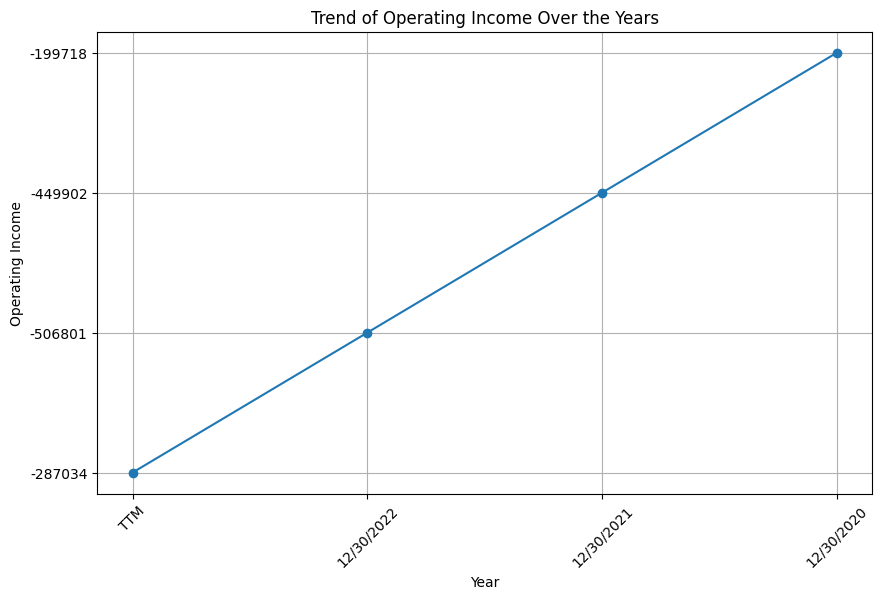

In [89]:
# Trend Analysis: Plotting the trend of Operating Income over the years
plt.figure(figsize=(10, 6))
plt.plot(df.columns[1:], df.loc[df['Category'] == 'Operating Income'].values[0][1:], marker='o')
plt.title('Trend of Operating Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Operating Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
